<a href="https://colab.research.google.com/github/alex-hse-repository/Information_System/blob/main/%D0%98%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотеки

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

from scipy.stats import expon
from scipy.stats import chisquare

# Класс симмуляционной модели

In [ ]:
class Statistics:
    def __init__(self, N, k):
        self.utilization = 0
        self.utilizations = np.zeros(N)
        self.lost_customers = np.zeros(k,dtype=int)
        self.served_customers = np.zeros(k,dtype=int)
        self.cutomers_num = 0
        self.destribution = {}
        self.lost_probs = np.zeros(k)
    def lose(self,k):
        self.lost_customers[k]+=1
    def serve(self,k):
        self.served_customers[k]+=1            
    def count_stats(self,duaration):
        #self.utilisations = np.sum(self.service_times,axis=1)/duaration
        #self.utilization = np.mean(self.utilizations)
        #self.cutomers_num = np.sum(self.lost_customers)+np.sum(np.sum(self.served_customers))
        self.cutomers_num = self.lost_customers+np.sum(self.served_customers)
        self.lost_probs = self.lost_customers/self.cutomers_num
        total = 0
        for state in self.destribution:
            total+=self.destribution[state]
        for state in self.destribution:
            self.destribution[state]/=total

In [ ]:
class Simulation:
    def __init__(self,N,g,lambdas,mus,duaration):
        self.stats = Statistics(N,len(mus))
        self.clock = 0.0
        self.duaration = duaration
        self.N = N
        self.g = g
        self.reserved = N-g
        self.lambdas = lambdas
        self.mus = mus
        self.X = np.zeros(k,dtype=int)
        self.arrival_evt = self.gen_arrival()
        self.servers = np.array([{'client_type':-1,'time':np.inf} for _ in range(N)])

    def arrival(self,client_type):
        if(self.arrival_is_possible(client_type)):
            self.stats.serve(client_type)
            server_id = self.get_server()
            self.X[client_type]+=1
            self.servers[server_id] = {'client_type':client_type,'time':self.gen_departure(client_type)}
        else:
            self.stats.lose(client_type)
        self.arrival_evt = self.gen_arrival()
    
    def departure(self,server_id):
        client_type = self.servers[server_id]['client_type']
        self.X[client_type]-=1
        self.servers[server_id] = {'client_type':-1,'time':np.inf}        

    def arrival_is_possible(self,client_type):
        free = self.N-np.sum(self.X)
        if(client_type==0):
            return free>self.reserved
        return free>0    
    def get_server(self):
        for server_id in range(self.N):
            if(self.servers[server_id]['time']==np.inf):
                return server_id

    def gen_arrival(self):
        times = self.clock+np.random.exponential(self.lambdas,size=len(self.lambdas))
        client_type = np.argmin(times)
        time = times[client_type]
        return {'client_type':client_type,'time':time}
    def gen_departure(self,client_type):
        time = self.clock+np.random.exponential(self.mus[client_type])
        return time    

    def next_arrival(self):
        return self.arrival_evt
    def next_departure(self):
        best = 0
        for server_id in range(self.N):
            time = self.servers[server_id]['time'] 
            min_time = self.servers[best]['time']
            if(time<min_time):
                best = server_id
        return {'server_id':best,'time':self.servers[best]['time']}
    def next_event(self):  
        arrival_evt = self.next_arrival()
        departure_evt = self.next_departure()                                              
        if(arrival_evt['time']<departure_evt['time']):
            self.arrival(arrival_evt['client_type'])
        else:
            self.departure(departure_evt['server_id'])
        self.clock = min(arrival_evt['time'],departure_evt['time'])    
     
    def run(self):
        t = 1
        while(self.clock<self.duaration):
            self.next_event()
            if(self.clock>t*10):
                t+=1
                print('cut_time: ',self.clock)
            cur_state = str(self.X)[1:-1] 
            if(cur_state in self.stats.destribution):
                self.stats.destribution[cur_state]+=1
            else:
                self.stats.destribution[cur_state]=1
        self.stats.count_stats(duaration)


0.9999999999999999


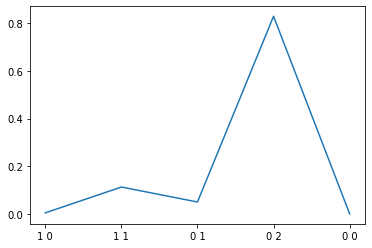

In [ ]:
probs = sim.state.stats.destribution
x = [key for key in probs]
y = [probs[key] for key in probs]
prob = np.sum(y)
plt.plot([key for key in probs],[probs[key] for key in probs])
print(probs)

In [ ]:
N = 100
k = 2
gs = [10,20,50,80,100]
lambdas = 1/np.array([1000,500])
mus = 1/np.array([10,15])
duaration = 100
probs = {'B1':[],'B2':[],'B':[]}
for g in gs:
    sim = Simulation(N,g,lambdas,mus,duaration)
    sim.run()
    prob = sim.stats.lost_probs
    probs['B1'].append(prob[0])
    probs['B2'].append(prob[1])
    probs['B'].append(np.sum(prob))

cut_time:  10.000273398868526
cut_time:  20.000459116733808
cut_time:  30.000353610213413
cut_time:  40.00031685014563
cut_time:  50.00024085996507
cut_time:  60.00010627695442
cut_time:  70.00033806099164
cut_time:  80.00043862594595
cut_time:  90.00002935368752
cut_time:  100.00011876370868
cut_time:  110.00009666497449
cut_time:  120.00011279879662
cut_time:  130.0009262334808
cut_time:  140.0001086265606
cut_time:  150.0010623336981
cut_time:  160.00075868936025
cut_time:  170.0003963909047
cut_time:  180.00072160667062
cut_time:  190.00000037573608
cut_time:  200.00043978569013
cut_time:  210.00175277184
cut_time:  220.00044134513587
cut_time:  230.0000503779983
cut_time:  240.00018362787546
cut_time:  250.00075289820884
cut_time:  260.00004652657896
cut_time:  270.0009446329978
cut_time:  280.0004010443362
cut_time:  290.0004783780506
cut_time:  300.0000579546902
cut_time:  310.00012089761964
cut_time:  320.00001791705006
cut_time:  330.00047691946446
cut_time:  340.0008096024335

In [ ]:
data = pd.DataFrame(probs)
data

,B1,B2,B
0,0.666757,0.000000,0.666757
1,0.667612,0.000000,0.667612
2,0.637200,0.000000,0.637200
3,0.511786,0.000011,0.511797
4,0.382440,0.236115,0.618555
